In [26]:
import pandas as pd
from sklearn import datasets
# load breast cancer data
cancer = datasets.load_breast_cancer()
# display keys of data
cancer.keys()

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
# features name 
cancer.feature_names

In [5]:
# description about dataset
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [11]:
# convert cancer features from cancer data to panda frame 
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df[:]

569

In [7]:
# show mean radius 
df['mean radius']

0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: mean radius, Length: 569, dtype: float64

In [8]:
# display first 100 rows
df[:100]
#display 99 data point (row)
df[99:100]
#display 99th row
df.iloc[99]

mean radius                 14.420000
mean texture                19.770000
mean perimeter              94.480000
mean area                  642.500000
mean smoothness              0.097520
mean compactness             0.114100
mean concavity               0.093880
mean concave points          0.058390
mean symmetry                0.187900
mean fractal dimension       0.063900
radius error                 0.289500
texture error                1.851000
perimeter error              2.376000
area error                  26.850000
smoothness error             0.008005
compactness error            0.028950
concavity error              0.033210
concave points error         0.014240
symmetry error               0.014620
fractal dimension error      0.004452
worst radius                16.330000
worst texture               30.860000
worst perimeter            109.500000
worst area                 826.400000
worst smoothness             0.143100
worst compactness            0.302600
worst concav

(a) How many rows and columns are there in this data set? What do the rows and columns
represent? 

(b) How many malignant cases are there in total?

(c) Make a scatterplot of ‘mean compactness’ and ‘mean perimeter’. Try to color the points by
their label (i.e. malignant or benign). You may find scatter (from matplotlib) or jointplot
(from seaborn) useful for this.

(d) Make pairwise scatterplots of ‘mean texture’, ‘mean perimeter’, ‘mean compactness’, and ‘mean
radius’. You may find scatter_matrix (from matplotlib) or pairplot (from seaborn) useful
for this. Do you notice that two of these features seem to be particularly correlated? Why
might this be?




In [20]:
#Q1
print(f"total columns : {len(df.columns)}")
print(f"total rows: {len(df[:])}")

total columns : 30
total rows: 569


In [42]:
#Q2
import numpy as np
print(f"total malignant cases: {np.sum(cancer.target==0)}")

total malignant cases: 212


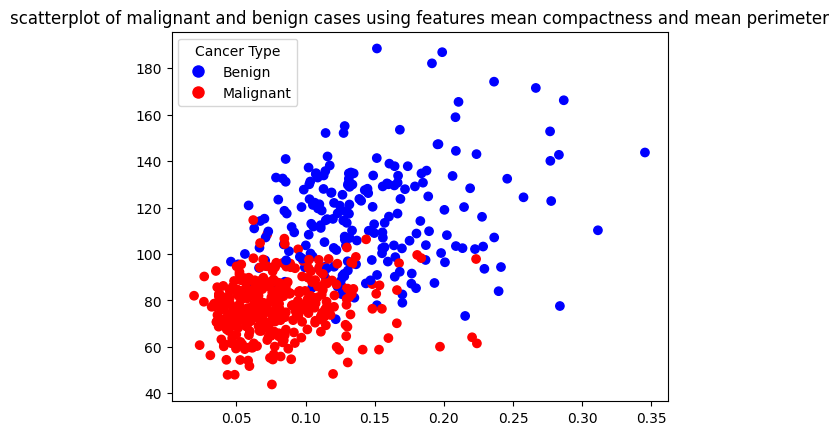

In [71]:
# Q3 

import matplotlib.pyplot as plot
df["target"] = cancer.target

x = df["mean compactness"]
y = df["mean perimeter"]


# give x,y and 
plot.scatter(x,y,c=df["target"],cmap='bwr')
# title
plot.title("scatterplot of malignant and benign cases using features mean compactness and mean perimeter")

# mark data points and legends
colors = ['blue', 'red']
labels = ['Benign', 'Malignant']
handles = [plot.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=color, markersize=10) for label, color in zip(labels, colors)]

plot.legend(handles=handles, title="Cancer Type")

plot.show()

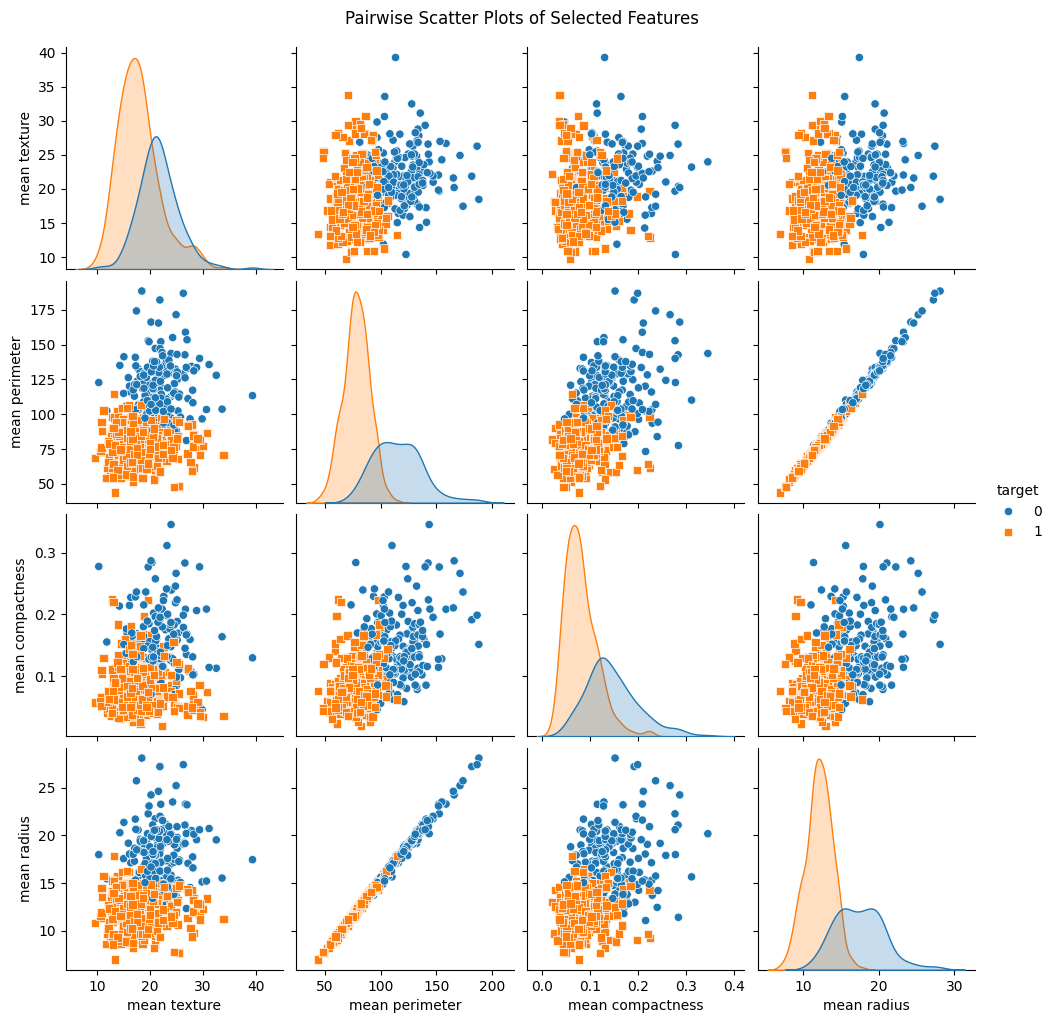

In [74]:
# Q4

import seaborn as sns
import matplotlib.pyplot as plot

# features to include in the pairplot
selected_features = ['mean texture', 'mean perimeter', 'mean compactness', 'mean radius', 'target']

features_selected = df[selected_features]

#  pairwise scatter plots 
sns.pairplot(features_selected, hue='target', markers=["o", "s"])

# the plot
plot.suptitle('Pairwise Scatter Plots of Selected Features', y=1.02)
plot.show()
